In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
import plotly.graph_objs as go
import pandas_profiling
import pickle
%matplotlib inline
import plotly.offline as py

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
dataframe= pd.read_csv('/content/drive/MyDrive/Data-Science-ML-Capstone-Projects-master/Telecom_customer_churn.csv')

In [3]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataframe.isnull().sum().any()

False

In [6]:
dataframe.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


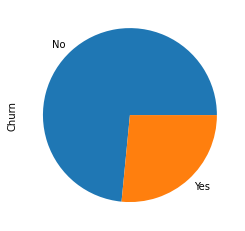

In [9]:
dataframe.Churn.value_counts().plot(kind = 'pie')

In [19]:
dataframe['Churn'].value_counts()

1    5174
0    1869
Name: Churn, dtype: int64

In [13]:
dataframe['Churn'] = dataframe['Churn'].replace(('Yes','No'),(0,1))

In [14]:
dataframe[['MultipleLines','Churn']].groupby(['MultipleLines'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,MultipleLines,Churn
1,No phone service,0.750733
0,No,0.749558
2,Yes,0.713901


In [20]:
dataframe['MultipleLines'].value_counts()

1    3390
0    2971
2     682
Name: MultipleLines, dtype: int64

In [18]:
dataframe['MultipleLines'] = dataframe['MultipleLines'].replace(('Yes','No','No phone service'),(0,1,2))

In [21]:
dataframe['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [22]:
dataframe[['gender','Churn']].groupby(['gender'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,gender,Churn
1,Male,0.738397
0,Female,0.730791


In [24]:
dataframe['gender'] = dataframe['gender'].replace(('Male','Female'),(0,1))

In [25]:
dataframe['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [28]:
dataframe[['Partner','Churn']].groupby(['Partner'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,Partner,Churn
0,0,0.803351
1,1,0.670420


In [27]:
dataframe['Partner'] = dataframe['Partner'].replace(('Yes','No'),(0,1))

In [30]:
dataframe['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [31]:
dataframe[['Dependents','Churn']].groupby(['Dependents'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,Dependents,Churn
1,Yes,0.845498
0,No,0.687209


In [32]:
dataframe['Dependents'] = dataframe['Dependents'].replace(('Yes','No'),(0,1))

In [34]:
dataframe['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [35]:
dataframe[['PhoneService','Churn']].groupby(['PhoneService'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,PhoneService,Churn
0,No,0.750733
1,Yes,0.732904


In [36]:
dataframe['PhoneService'] = dataframe['PhoneService'].replace(('Yes','No'),(0,1))

In [38]:
dataframe['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [39]:
dataframe[['InternetService','Churn']].groupby(['InternetService'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,InternetService,Churn
2,No,0.925950
0,DSL,0.810409
1,Fiber optic,0.581072


In [41]:
dataframe['InternetService'] = dataframe['InternetService'].replace(('No','DSL','Fiber optic'),(0.93,0.81,0.58))

In [43]:
dataframe['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [44]:
dataframe[['OnlineSecurity','Churn']].groupby(['OnlineSecurity'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,OnlineSecurity,Churn
1,No internet service,0.925950
2,Yes,0.853888
0,No,0.582333


In [45]:
dataframe['OnlineSecurity'] = dataframe['OnlineSecurity'].replace(('No internet service','Yes','No'),(0.93,0.85,0.58))

In [47]:
dataframe['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [48]:
dataframe[['OnlineBackup','Churn']].groupby(['OnlineBackup'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,OnlineBackup,Churn
1,No internet service,0.925950
2,Yes,0.784685
0,No,0.600712


In [49]:
dataframe['OnlineBackup'] = dataframe['OnlineBackup'].replace(('No internet service','Yes','No'),(0.93,0.78,0.6))

In [51]:
dataframe['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [52]:
dataframe[['DeviceProtection','Churn']].groupby(['DeviceProtection'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,DeviceProtection,Churn
1,No internet service,0.925950
2,Yes,0.774979
0,No,0.608724


In [53]:
dataframe['DeviceProtection'] = dataframe['DeviceProtection'].replace(('No internet service','Yes','No'),(0.93,0.77,0.6))

In [55]:
dataframe['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [56]:
dataframe[['TechSupport','Churn']].groupby(['TechSupport'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,TechSupport,Churn
1,No internet service,0.925950
2,Yes,0.848337
0,No,0.583645


In [58]:
dataframe['TechSupport'] = dataframe['TechSupport'].replace(('No internet service','Yes','No'),(0.93,0.85,0.58))

In [60]:
dataframe['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [61]:
dataframe[['StreamingTV','Churn']].groupby(['StreamingTV'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,StreamingTV,Churn
1,No internet service,0.925950
2,Yes,0.699298
0,No,0.664769


In [63]:
dataframe['StreamingTV'] = dataframe['StreamingTV'].replace(('No internet service','Yes','No'),(0.93,0.7,0.66))

In [65]:
dataframe['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [66]:
dataframe[['StreamingMovies','Churn']].groupby(['StreamingMovies'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,StreamingMovies,Churn
1,No internet service,0.925950
2,Yes,0.700586
0,No,0.663196


In [67]:
dataframe['StreamingMovies'] = dataframe['StreamingMovies'].replace(('No internet service','Yes','No'),(0.93,0.7,0.66))

In [69]:
dataframe['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [70]:
dataframe[['Contract','Churn']].groupby(['Contract'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,Contract,Churn
2,Two year,0.971681
1,One year,0.887305
0,Month-to-month,0.572903


In [71]:
dataframe['Contract'] = dataframe['Contract'].replace(('Two year','One year','Month-to-month'),(0.97,0.88,0.57))

In [74]:
dataframe['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [75]:
dataframe[['PaperlessBilling','Churn']].groupby(['PaperlessBilling'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,PaperlessBilling,Churn
0,No,0.836699
1,Yes,0.664349


In [76]:
dataframe['PaperlessBilling'] = dataframe['PaperlessBilling'].replace(('No','Yes'),(0.84,0.66))

In [78]:
dataframe['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [79]:
dataframe[['PaymentMethod','Churn']].groupby(['PaymentMethod'], 
                as_index = False).mean().sort_values(by = 'Churn', ascending = False)

,PaymentMethod,Churn
1,Credit card (automatic),0.847569
0,Bank transfer (automatic),0.832902
3,Mailed check,0.808933
2,Electronic check,0.547146


In [80]:
dataframe['PaymentMethod'] = dataframe['PaymentMethod'].replace(('Credit card (automatic)','Bank transfer (automatic)','Mailed check','Electronic check'),
                                                                (0.85,0.83,0.80,0.55))

In [84]:
dataframe=dataframe.drop(['TotalCharges','customerID'],axis=1)

In [85]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [86]:
X=dataframe.drop('Churn',axis=1)
y=dataframe['Churn']

In [87]:
print(X.shape)
print(y.shape)

(7043, 18)
(7043,)


In [88]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(), SVC(kernel='rbf'),AdaBoostClassifier(),GradientBoostingClassifier()]
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=r_s)
  for i in model:
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    r2_sc=accuracy_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )



Max Score is  0.8197303051809794   For Random State  89  and model is  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=89)

In [91]:
best_model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [92]:
best_model.fit(X_train,y_train)
pre=i.predict(X_test)
print(accuracy_score(y_test,pre))

0.8197303051809794


In [93]:
pickle.dump(best_model, open('model_churn.pkl', 'wb'))

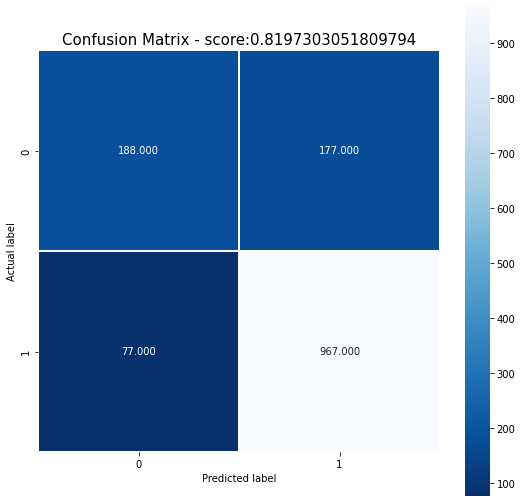

              precision    recall  f1-score   support

           0       0.71      0.52      0.60       365
           1       0.85      0.93      0.88      1044

    accuracy                           0.82      1409
   macro avg       0.78      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409



In [94]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, pre)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,pre))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,pre))